In [3]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup

In [4]:
def simple_get(url):
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else :
                return None
    except RequestException as re:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


In [18]:
def is_good_response(resp):
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 and content_type is not None and content_type.find('html') > -1)

In [19]:
def log_error(e):
    print(e)

In [44]:

#raw_html = simple_get('https://realpython.com/blog/')


In [45]:
#raw_html = simple_get('http://www.fabpedigree.com/james/mathmen.htm')


In [46]:
# parsing Big Basket Item by Item
raw_html = simple_get('https://www.bigbasket.com/pd/40053874')


89221
b'<!doctype html><html lang="en"  ><head>\n\t<meta charset="utf-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5, shrink-to-fit=no, user-scalable=yes">\n  <meta name="theme-color" content="#689f38">\n\n  <title data-react-helmet="true">Buy Weikfield Vinegar Chilli 200 Gm Online At Best Price - bigbasket</title>\n  <meta data-react-helmet="true" name="description" content="Buy Weikfield Vinegar Chilli 200 Gm Online At Best Price"/><meta data-react-helmet="true" name="keywords" content="Weikfield Chilli Vinegar, 200 g  "/><meta data-react-helmet="true" property="og:url" content="https://www.bigbasket.com/pd/40053874"/><meta data-react-helmet="true" property="og:type" content="website"/><meta data-react-helmet="true" property="og:title" content="Buy Weikfield Vinegar Chilli 200 Gm Online At Best Price - bigbasket"/><meta data-react-helmet="true" property="og:description" content="Buy Weikfield Vinegar Chilli 200 Gm Online At Best Price"/><me
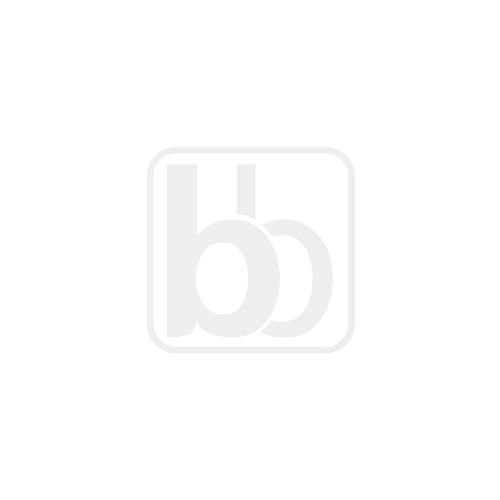
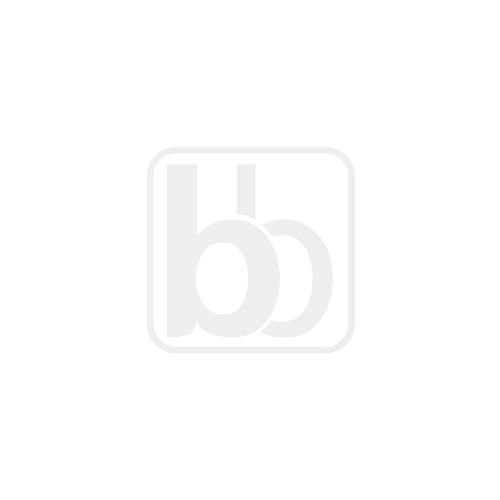
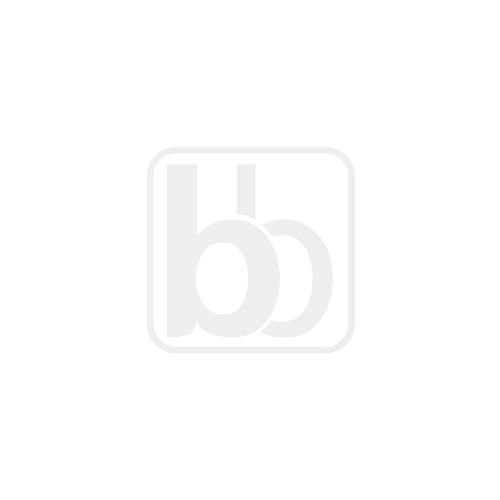
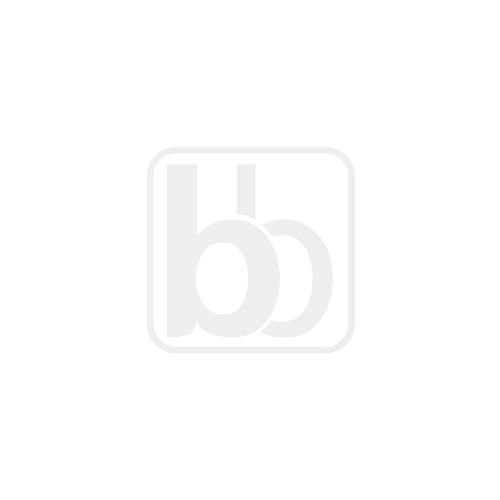
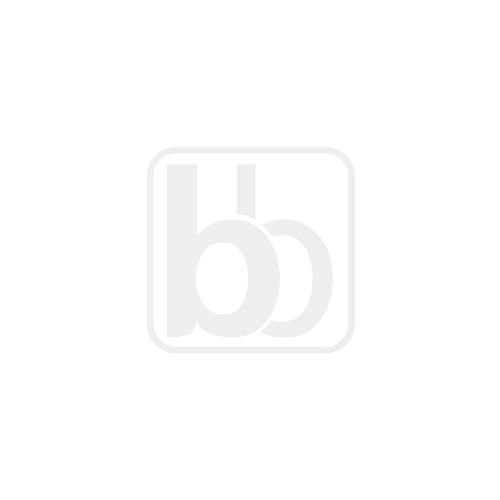

In [47]:
print(len(raw_html))
print(raw_html)

In [48]:

html = BeautifulSoup(raw_html, 'html.parser')
for i, li in enumerate(html.select('li')):
    print(i, li.text)

0 About Us
1 In News
2 Green bigbasket
3 Privacy Policy
4 Affiliate
5 Terms and Conditions
6 Careers At bigbasket
7 bb Instant
8 bb Daily
9 FAQs
10 Contact Us
11 bb Wallet FAQs
12 bb Wallet T&Cs
13 Vendor Connect
14 
15 
16 
17 
18 Sunflower Oils,
19 Wheat Atta,
20 Ghee,
21 Milk,
22 Health Drinks,
23 Flakes,
24 Organic F&V,
25 Namkeen,
26 Eggs,
27 Floor Cleaners,
28 Other Juices,
29 Leafy Vegetables,
30 Frozen Veg Food,
31 Diapers & Wipes,
32 Fresho,
33 bb Royal,
34 Nandini,
35 Kelloggs,
36 24 Mantra,
37 Saffola,
38 Lizol,
39 Safal,
40 Horlicks,
41 MTR,
42 Fresho Meats,
43 Whisper ,
44 Real,
45 Milky Mist,
46 Nivea,
47 Himalaya,
48 Comfort,
49 Sunpure ,
50 Bru ,
51 Zespri,
52 Bangalore, 
53 Hyderabad, 
54 Mumbai, 
55 Pune, 
56 Chennai, 
57 Delhi, 
58 Mysore, 
59 Coimbatore, 
60 Vijayawada-Guntur, 
61 Kolkata, 
62 Ahmedabad-Gandhinagar, 
63 Lucknow-Kanpur, 
64 Gurgaon, 
65 Vadodara, 
66 Visakhapatnam, 
67 Surat, 
68 Nagpur, 
69 Patna, 
70 Indore, 
71 Chandigarh Tricity, 
72 Jaipur, 
73 

In [49]:
def get_names(html):
    names = set()
    for i in html.select('li'):
#         print('li:', i)
        for name in i.text.split('\n'):
            if(len(name) > 0):
                names.add(name.strip())
    return list(names)

In [50]:
print(get_names(html))

['Lucknow-Kanpur,', 'Vadodara,', 'Organic F&V,', 'MTR,', 'Kochi,', 'Zespri,', 'Chandigarh Tricity,', 'bb Wallet T&Cs', 'CASH ON DELIVERY', 'Health Drinks,', 'Contact Us', 'Privacy Policy', 'Leafy Vegetables,', 'Whisper ,', 'Fresho Meats,', 'FAQs', 'Vijayawada-Guntur,', 'Other Juices,', 'Horlicks,', 'Hyderabad,', 'Namkeen,', '24 Mantra,', 'Vendor Connect', 'Saffola,', 'Nagpur,', 'Bhopal,', 'bb Daily', 'Ghee,', 'Mysore,', 'Delhi,', 'Kolkata,', 'Coimbatore,', 'Milk,', 'Nandini,', 'Bru ,', 'Comfort,', 'Patna,', 'Wheat Atta,', 'bb Royal,', 'bb Wallet FAQs', 'Pune,', 'Noida-Ghaziabad,', 'bb Instant', 'Gurgaon,', 'Fresho,', 'Careers At bigbasket', 'Lizol,', 'Visakhapatnam,', 'Diapers & Wipes,', 'Floor Cleaners,', 'Surat,', 'Green bigbasket', 'Himalaya,', 'Mumbai,', 'Terms and Conditions', 'Affiliate', 'Eggs,', 'Kelloggs,', 'Frozen Veg Food,', 'Sunflower Oils,', 'Milky Mist,', 'Sunpure ,', 'Ahmedabad-Gandhinagar,', 'Bangalore,', 'Chennai,', 'Nivea,', 'Safal,', 'Jaipur,', 'Flakes,', 'Real,', 'I

In [67]:
# specific to BigBasket.com
# find a particular element text with class 'GrE04' and header 'h1'
bigBasketProductInfo = html.find("h1", {"class": "GrE04"}).text  # .text will give us the text underlying that HTML element
print(bigBasketProductInfo)

Weikfield Chilli Vinegar, 200 g  


In [68]:
# now splitting the value to get the exact name of the product
bigBasketProductInfo.split(' ', 1)

['Weikfield', 'Chilli Vinegar, 200 g  ']

In [69]:
# now get the brand name exactly
bigBasketBrandName = bigBasketProductInfo.split(' ', 1)[0]
print('Brand:',bigBasketBrandName)

Brand: Weikfield


In [70]:
# now get the product name exactly
bigBasketProductName = bigBasketProductInfo.split(' ', 1)[1].split(',')[0]
print('Product:', bigBasketProductName)

Product: Chilli Vinegar


In [73]:
# now get the product name exactly
bigBasketProductQty = bigBasketProductInfo.split(' ', 1)[1].split(',')[1]
print('Product Qty:', bigBasketProductQty.strip())

Product Qty: 200 g


In [72]:
## find the tag from html which was parsed above
bigBasketProductPrice = html.find("td", {"data-qa": "productPrice"}).text.strip()
print('Product Price:', bigBasketProductPrice)

Product Price: Rs 45


In [74]:
## find the description tag from html which was parsed above
bigBasketProductDesc = html.find("div", {"class": "_26MFu"}).text.strip().split('   ')[-1]
print('Product Description:', bigBasketProductDesc)

Product Price: The spiciness of a fresh green chilli diffusing its heat into sharp vinegar makes this spicy vinegar a unique fusion of spicy and sour notes.


In [77]:
# now parsing BigBasket.com for a list of items, above I did for one itm

itemCodes = [126906,40139631,40041188,40075201,40053874,1204742,40046735,40100963,40067874,40045943]
ProductNamesList = []
BrandNamesList = []
ProductPriceList = []
ProductQuantityList = []
ProductDescList = []

for item in itemCodes:
    raw_html = simple_get('https://www.bigbasket.com/pd/'+str(item))
    html = BeautifulSoup(raw_html, 'html.parser')
        
    productInfo = html.find("h1", {"class": "GrE04"}).text.strip()
    
    productName = productInfo.split(' ', 1)[1].split(',')[0]
    ProductNamesList.append(productName)
    
    brandName = productInfo.split(' ', 1)[0]
    BrandNamesList.append(brandName)
    
    productQty = productInfo.split(' ', 1)[1].split(',')[1]
    ProductQuantityList.append(productQty)
    
    productPrice = html.find("td", {"data-qa": "productPrice"}).text.strip()
    ProductPriceList.append(productPrice)
    
    productDesc = html.find("div", {"class": "_26MFu"}).text.strip().split('   ')[-1]
    ProductDescList.append(productDesc)
    
print('ProductNamesList =>', ProductNamesList)
print('BrandNamesList =>', BrandNamesList)
print('ProductQuantityList =>', ProductQuantityList)
print('ProductPriceList =>', ProductPriceList)
print('ProductDescList =>', ProductDescList)
    
    
    

ProductNamesList => ['Atta - Whole Wheat', 'Chef Pasta - Spirali', 'Monte Olive Oil - Extra Light', 'Popular Sugar', 'Chilli Vinegar', 'Honey', 'Royal Til - Black', 'Royal Organic - Cinnamon Powder', 'Soya Sauce', 'Butter - Pasteurised']
BrandNamesList => ['Aashirvaad', 'Magic', 'Del', 'bb', 'Weikfield', 'Patanjali', 'bb', 'bb', 'Weikfield', 'Amul']
ProductQuantityList => [' 10 kg Pouch', ' 150 g Pouch', ' 5 L', ' 500 g', ' 200 g', ' 2x250 g Multipack', ' 200 g', ' 50 g', ' 220 g', ' 200 g Tub']
ProductPriceList => ['Rs 412', 'Rs 20', 'Rs 2899', 'Rs 28', 'Rs 45', 'Rs 150', 'Rs 100', 'Rs 45', 'Rs 45', 'Rs 98']
ProductDescList => ['Aashirvaad whole wheat atta is made of zero per cent maida and 100% atta, which makes it extremely nutritious since its packed with health benefits. This also means more fluffy and soft rotis at home. Aashirvaad Atta is also made from the best grains - heavy on the palm, golden amber in colour and hard in bite. It is grounded using the chakki - grinding proces

In [79]:
# converting above scraped data in Python DataFrame
import pandas as pd

table_dict = { 'ProductNamesList' : ProductNamesList,
                'BrandNamesList' : BrandNamesList,
                'ProductQuantityList' : ProductQuantityList,
                'ProductPriceList' : ProductPriceList,
                'ProductDescList' : ProductDescList}

df = pd.DataFrame(table_dict)

print(df)

                  ProductNamesList BrandNamesList ProductQuantityList  \
0               Atta - Whole Wheat     Aashirvaad         10 kg Pouch   
1             Chef Pasta - Spirali          Magic         150 g Pouch   
2    Monte Olive Oil - Extra Light            Del                 5 L   
3                    Popular Sugar             bb               500 g   
4                   Chilli Vinegar      Weikfield               200 g   
5                            Honey      Patanjali   2x250 g Multipack   
6                Royal Til - Black             bb               200 g   
7  Royal Organic - Cinnamon Powder             bb                50 g   
8                       Soya Sauce      Weikfield               220 g   
9             Butter - Pasteurised           Amul           200 g Tub   

  ProductPriceList                                    ProductDescList  
0           Rs 412  Aashirvaad whole wheat atta is made of zero pe...  
1            Rs 20  Magic Chef Pasta is made from wh

In [80]:
# saving the data to csv file
df.to_csv('bigBasket.csv', index=False)

# saving the data to Json file
df.to_json('bigBasket.json', orient='records')


In [44]:
## GROFERS
from selenium import webdriver
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd

In [47]:
# JioMart - Dals and Pulses
raw_html = simple_get('https://www.jiomart.com/category/staples/dals-pulses')
# raw_html = driver.get('https://www.flipkart.com/food-nutrition/beverages/pr?sid=7jv,ldw&otracker=categorytree')

print(raw_html)


b'<!doctype html> <html lang="en-US"> <head> <title>Dals &amp; Pulses - JioMart</title> <meta charset="utf-8"> <meta name="robots" content="INDEX,FOLLOW"> <meta name="description" content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." /> <meta name="keywords" content="" /> <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0"> <meta property="og:site_name" content="JioMart" /> <meta property="og:type" content="website" /> <meta property="og:title" content="Dals & Pulses - JioMart" /> <meta property="og:description" content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits & vegetables, dairy & bakery, packaged food." /> <meta property="og:url" content="https://www.jiomart.com/category/staples/dals-pulses" /> <meta property="og:imag

In [49]:
html = BeautifulSoup(raw_html, 'html.parser')
print(html)

<!DOCTYPE html>
 <html lang="en-US"> <head> <title>Dals &amp; Pulses - JioMart</title> <meta charset="utf-8"/> <meta content="INDEX,FOLLOW" name="robots"/> <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." name="description"> <meta content="" name="keywords"> <meta content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/> <meta content="JioMart" property="og:site_name"> <meta content="website" property="og:type"/> <meta content="Dals &amp; Pulses - JioMart" property="og:title"/> <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." property="og:description"/> <meta content="https://www.jiomart.com/category/staples/dals-pulses" property="og:url"/> <meta content="http

In [52]:
containers = html.findAll("div", {"class" : "col-md-3 p-0"})
print (BeautifulSoup.prettify(containers[0]))

<div class="col-md-3 p-0">
 <div class="cat-item">
  <a class="category_name" href="https://www.jiomart.com/good-life-dal-mix-500-gm-491187271" title="Good Life Dal Mix 500 gm">
   <span class="cat-img">
    <img alt="Good Life Dal Mix 500 gm" class="product-image-photo" src="https://www.jiomart.com/images/product/150x150/491187271/good-life-dal-mix-500-gm-pp-0-20200518.jpg"/>
   </span>
   <span class="dis_section">
    <span>
     21
     <span class="per_txt">
      %
     </span>
    </span>
    <br/>
    off
   </span>
   <span class="clsgetname">
    Good Life Dal Mix 500 gm
   </span>
  </a>
  <a href="https://www.jiomart.com/manufacturers/private-label" title="Private Label">
   <span class="drug-varients ellipsis">
    Mfr: Private Label
   </span>
  </a>
  <div class="clearfix">
  </div>
  <span class="price-box">
   <strike id="price">
    Rs. 75.00
   </strike>
   <span id="final_price">
    Rs. 59.00
   </span>
  </span>
  <div class="cart_btn">
   <form class="cart-form">

In [53]:
container = containers[0]
print (container.div.img["alt"])

Good Life Dal Mix 500 gm


In [54]:
price = container.findAll("strike", {"id" : "price"})
print (price[0].text)

Rs. 75.00


In [55]:
final_price = container.findAll("span", {"id" : "final_price"})
print (final_price[0].text)

Rs. 59.00


In [56]:
filename = "JioMart.csv"
f = open(filename, "w")
headers = "product,price,final_price\n"
f.write(headers)

26

In [57]:
for container in containers:
    product = container.div.img["alt"]
    
    price_container = container.findAll("strike", {"id" : "price"})
    price = price_container[0].text.strip()
    
    final_price_container = container.findAll("span", {"id" : "final_price"})
    final_price = final_price_container[0].text.strip()
    
    #print ("Product:" + product)
    #print ("Price:" + price)
    #print ("Final Price:" + final_price)
    
    print (product + "," + price + "," + final_price + "\n")
    f.write(product + "," + price + "," + final_price + "\n")
    
f.close()

Good Life Dal Mix 500 gm,Rs. 75.00,Rs. 59.00

Plain Toor Dal 2 kg,Rs. 280.00,Rs. 190.00

Raw Peanuts 1 Kg (Loose),Rs. 127.00,Rs. 125.00

Good Life Toor Dal 1 kg,Rs. 137.00,Rs. 108.00

Loose Toor Dal Value 1 kg,Rs. 101.00,Rs. 95.00

Pick N Cook Premium Moong Dal 1 kg,Rs. 226.00,Rs. 180.00

Good Life Rajma Sharmili 500 gm,Rs. 59.00,Rs. 52.00

Pick N Cook Small Chana 500 gm,Rs. 64.00,Rs. 56.00

Loose Chana Dal 1 kg,Rs. 68.00,Rs. 61.00

Good Life Raw Peanut 500 gm,Rs. 100.00,Rs. 83.00

Pick N Cook Maha Toor Dal 1 kg,Rs. 144.00,Rs. 120.00

Good Life Chana Dal 1 kg,Rs. 95.00,Rs. 74.00

Good Life Chana Dal 500 gm,Rs. 49.00,Rs. 40.00

Loose Moong Dal 1 kg,Rs. 132.00,Rs. 130.00

Pnc Masoor Dal 500 gm,Rs. 70.00,Rs. 63.00

Good Life Toor Dal 500 gm,Rs. 70.00,Rs. 56.00

Good Life Rajma Chitra 500 gm,Rs. 85.00,Rs. 75.00

Best Farms Green Chana 500 gm,Rs. 63.00,Rs. 55.00

Pick N Cook Regular Kabuli Chana 500 gm,Rs. 70.00,Rs. 63.00

Tata Sampann High Protein Unpolished Moong Dal 1 kg,Rs. 190.00,Rs. 1

In [58]:
# JioMart - Vegetables
raw_html = simple_get('https://www.jiomart.com/category/fruits-vegetables/fresh-vegetables')
# raw_html = driver.get('https://www.flipkart.com/food-nutrition/beverages/pr?sid=7jv,ldw&otracker=categorytree')

print(raw_html)

b'<!doctype html> <html lang="en-US"> <head> <title>Fresh Vegetables - JioMart</title> <meta charset="utf-8"> <meta name="robots" content="INDEX,FOLLOW"> <meta name="description" content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." /> <meta name="keywords" content="" /> <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0"> <meta property="og:site_name" content="JioMart" /> <meta property="og:type" content="website" /> <meta property="og:title" content="Fresh Vegetables - JioMart" /> <meta property="og:description" content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits & vegetables, dairy & bakery, packaged food." /> <meta property="og:url" content="https://www.jiomart.com/category/fruits-vegetables/fresh-vegetables" /> <meta 

In [59]:
html = BeautifulSoup(raw_html, 'html.parser')
print(html)

<!DOCTYPE html>
 <html lang="en-US"> <head> <title>Fresh Vegetables - JioMart</title> <meta charset="utf-8"/> <meta content="INDEX,FOLLOW" name="robots"/> <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." name="description"> <meta content="" name="keywords"> <meta content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/> <meta content="JioMart" property="og:site_name"> <meta content="website" property="og:type"/> <meta content="Fresh Vegetables - JioMart" property="og:title"/> <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." property="og:description"/> <meta content="https://www.jiomart.com/category/fruits-vegetables/fresh-vegetables" property="og:url"/> <meta 

In [60]:
containers = html.findAll("div", {"class" : "col-md-3 p-0"})
print (BeautifulSoup.prettify(containers[0]))

<div class="col-md-3 p-0">
 <div class="cat-item">
  <a class="category_name" href="https://www.jiomart.com/potato-per-kg-590000090" title="Potato per Kg">
   <span class="cat-img">
    <img alt="Potato per Kg" class="product-image-photo" src="https://www.jiomart.com/images/product/150x150/590000090/potato-kg-0-20200518.jpg"/>
   </span>
   <span class="clsgetname">
    Potato per Kg
   </span>
  </a>
  <a href="https://www.jiomart.com/manufacturers/na" title="-NA-">
   <span class="drug-varients ellipsis">
    Mfr: -NA-
   </span>
  </a>
  <div class="clearfix">
  </div>
  <span class="price-box">
   <span id="final_price">
    Rs. 28.00
   </span>
  </span>
  <div class="cart_btn">
   <form class="cart-form">
    <input class="cart_qty" name="qty" type="hidden" value="1"/>
    <input name="sku" type="hidden" value="590000090"/>
    <button class="toCart cartbag" data-change="no" data-sku="590000090" title="ADD TO CART" type="submit">
     Add to Cart
    </button>
   </form>
  </div>

In [78]:
container = containers[0]
print (container.div.img["alt"])

Potato per Kg


In [67]:
final_price = container.findAll("span", {"id" : "final_price"})
print (final_price[0].text)

Rs. 28.00


In [1]:
for container in containers:
    product = container.div.img["alt"]

    #     price_container = container.findAll("strike", {"id" : "price"})
    #     price = price_container[0].text.strip()

    final_price_container = container.findAll("span", {"id" : "final_price"})
    final_price = final_price_container[0].text

    #     print ("Product:" + product)
    #     print ("Final Price:" + final_price)

    #     print (final_price)
    print(product + ","  + final_price + "\n")
    
# f.close()

NameError: name 'containers' is not defined

In [80]:
## JioMart - Fruits
raw_html = simple_get('https://www.jiomart.com/category/fruits-vegetables/fresh-fruits')
# raw_html = driver.get('https://www.flipkart.com/food-nutrition/beverages/pr?sid=7jv,ldw&otracker=categorytree')

print(raw_html)


b'<!doctype html> <html lang="en-US"> <head> <title>Fresh Fruits - JioMart</title> <meta charset="utf-8"> <meta name="robots" content="INDEX,FOLLOW"> <meta name="description" content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." /> <meta name="keywords" content="" /> <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0"> <meta property="og:site_name" content="JioMart" /> <meta property="og:type" content="website" /> <meta property="og:title" content="Fresh Fruits - JioMart" /> <meta property="og:description" content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits & vegetables, dairy & bakery, packaged food." /> <meta property="og:url" content="https://www.jiomart.com/category/fruits-vegetables/fresh-fruits" /> <meta property="og

In [83]:
html = BeautifulSoup(raw_html, 'html.parser')
print(html)

<!DOCTYPE html>
 <html lang="en-US"> <head> <title>Fresh Fruits - JioMart</title> <meta charset="utf-8"/> <meta content="INDEX,FOLLOW" name="robots"/> <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." name="description"> <meta content="" name="keywords"> <meta content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/> <meta content="JioMart" property="og:site_name"> <meta content="website" property="og:type"/> <meta content="Fresh Fruits - JioMart" property="og:title"/> <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." property="og:description"/> <meta content="https://www.jiomart.com/category/fruits-vegetables/fresh-fruits" property="og:url"/> <meta content="htt

In [95]:
containers = html.findAll("a", {"class" : "category_name"})
print (containers)

[]


In [2]:
container = containers[0]
print (container.div.img["alt"])

NameError: name 'containers' is not defined